# ML210-Assignment 6: Resampling Methods

Dataset needed:
UCI Diabetes Data Set  (https://archive.ics.uci.edu/ml/datasets/diabetes)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('diabetes.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h3> Q.1. Make an 80/20 train/test split</h3>

In [4]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1].values
y = data.iloc[:, 8].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Q.2. Fit a logistic regression model on the training data</h3>

In [7]:
from sklearn.linear_model import LogisticRegression
log_rgr = LogisticRegression(max_iter=10000)
model_log = log_rgr.fit(X_train, y_train)

<h3> Q.3. Predict the test data</h3>

In [9]:
y_pred = model_log.predict(X_test)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


<h3> Q.4. Plot the ROC curve and compute the AUC score</h3>

AUC: 0.7303030303030302


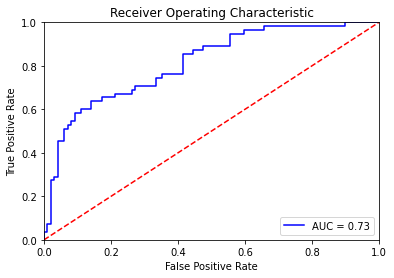

In [10]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
probs = log_rgr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds) #TODO
roc_auc = metrics.roc_auc_score(y_test, y_pred) #TODO


print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3> Q.5. Calculate the accuracy metric of the observations in the test set</h3>

In [ ]:
#TODO
from sklearn.metrics import mean_squared_error
import numpy as np


## Cross-Validation

## *k-*Fold Cross-Validation

<h3> Q.6. In few sentences, explain how K-fold procedure work<h3>

In [ ]:
# Explain here

<h3> Q.7. Perform logistic regression using *k-*fold cross validation, try different values of k and print out the mean accuracy obtained.
</h3>

In [ ]:
from sklearn.model_selection import cross_val_score

scores = #TODO

print(scores.mean())

## The Bootstrap

<h3> Q.8.Print the target class distribution (You can see that there's almost twice as much 0s than 1s)
</h3>

In [ ]:
#TODO

Let's perform bootstrapping to up-sample the minority class

1. First, we'll import the resampling module from Scikit-Learn
2. Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class
3. Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [ ]:
# Separate majority and minority classes
majority_class = #TODO
minority_class = #TODO
 
# Upsample minority class
minority_upsampled = resample(minority_class, 
                                 replace=#TODO,     # sample with replacement
                                 n_samples=#TODO,   # to match majority class
                                 random_state=42)   # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([majority_class, minority_upsampled])
 

<h3> Q.9. Display new class counts</h3>

In [ ]:
#TODO: the new DataFrame should now have more observations than the original, and the ratio of the two classes is now 1:1

<h3> Q.10. Let's train another model using Logistic Regression, this time on the balanced dataset</h3>

In [ ]:
# Separate input features (X) and target variable (y)
#TODO

#Perform train test split 80/20
#TODO

# Train model
#TODO
 
# Predict on training set
#TODO

# How's our accuracy? Has it improved? Comment
#TODO

<h3> Q.11. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [ ]:
# Enter summary here